# Горбатый потенциал

Мы будем искать решения стационарного уравнения Шрёдингера следующего вида:
$$(-\frac {d^2} {dx^2}  + \frac {c} {cosh(x)} - \frac {c} {cosh(a)} ) \psi = k \cdot \psi $$
С нулевыми граничными условиями при $|x|=a=1$

<IPython.core.display.Javascript object>


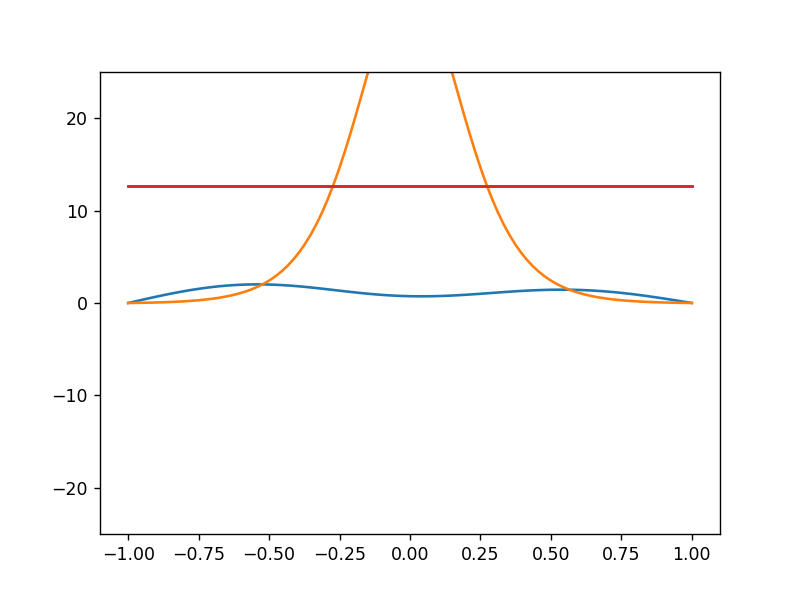

interactive(children=(IntSlider(value=1, description='c', min=-100), Output()), _dom_classes=('widget-interact…

In [16]:
import numpy as np


density = 100

def build(n = 100, c = 0):
    h = 2 / n
    matrix = np.zeros((n,n))
    matrix[0,0] = 100000
    matrix[n-1,n-1] = 100000
    for i in range (1, n-1):
      
        matrix[i,i-1] = -1/ (h ** 2)
        matrix[i,i] = 2/(h ** 2)
        matrix[i,i+1] = -1/(h ** 2)
        matrix[i,i] += c/(np.cosh(-4+4*h*i)**2) - c/(np.cosh(4)**2)
    return matrix

def t(n = 100, c = 0):
    h = 2 / n
    matrix = np.zeros((n,n))
    matrix[0,0] = 100000
    matrix[n-1,n-1] = 100000
    for i in range (1, n-1):
      
        matrix[i,i-1] = -1/ (h ** 2)
        matrix[i,i] = 2/(h ** 2)
        matrix[i,i+1] = -1/(h ** 2)
      
    return matrix


eigenValues, eigenVectors = np.linalg.eig(build(density, 0))

idx = eigenValues.argsort()   
val = eigenValues[idx]
vec = eigenVectors[:,idx]



import matplotlib.pyplot as plt

%matplotlib notebook
from ipywidgets import *

x = np.linspace(-1, 1, density)
fig = plt.figure()
ham = t()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, 2.5*vec[:,0])
linez, = ax.plot(x, 1/(np.cosh(4*x)**2) - 1/(np.cosh(4) ** 2))
b = t(100,1) @ vec[:,0]
liney, = ax.plot(x, b)
yd = np.ones((density))
lineen, = ax.plot(x,val[0]*yd)



def update(c = 1.0):
    eigenValues, eigenVectors = np.linalg.eig(build(density, c))

    idx = eigenValues.argsort()   
    val = eigenValues[idx]
    vec = eigenVectors[:,idx]
    
    plt.ylim(top=25)
    plt.ylim(bottom=-25)
    if(vec[2,0] < 0):
        vec[:,0] *= -1
    
    line.set_ydata(val[0]*vec[:,0])
    linez.set_ydata(c/((np.cosh(4*x)**2)) - c/((np.cosh(4)**2)))
    b = t(100,0) @ vec[:,0]
    potential = (c/((np.cosh(4*x)**2)) - c/((np.cosh(4)**2))) * vec[:,0] 
    liney.set_ydata(vec[:,0].T @ (b + potential))
    yd = np.ones((density))
    lineen.set_ydata(val[0] * yd)
    
    
    fig.canvas.draw()

interact(update, c = widgets.IntSlider(min=-100,max=100,step=1,value=1));


На графике сверху изображен квадрат волновой функции основного состояния. Слайдер регулирует величину горба. Из необъяснимых феноменов - отсутствует вырождение (хотя понятно, например, что при больших c запертой между левой стенкой и горбом волновой функции также должна соответствовать ей симметричная).

Вот сама волновая функция второго состояния

In [ ]:
x1 = np.linspace(-1, 1, density)
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
line1, = ax1.plot(x1, vec[:,2] )

def update1(d = 1.0):
    eigenValues, eigenVectors = np.linalg.eig(build(density, d))

    idx = eigenValues.argsort()   
    val = eigenValues[idx]
    vec = eigenVectors[:,idx]
    if (vec[2,2] < 0):
        vec[:,2] *= -1
    
    plt.ylim(top=0.3)
    plt.ylim(bottom=-0.3)
    line1.set_ydata(vec[:,2])
    fig1.canvas.draw()
interact(update1, d = widgets.IntSlider(min=-500,max=500,step=1,value=1));


Зависимость логарифма корня из модуля энергии от логарифма номера уровня:

In [ ]:

x2 = np.linspace(0, density-1, density)
fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
line2, = ax2.plot(np.log(x2[0:x2.size-2]), np.log(np.abs(val[0:x2.size-2])**(1/2)))

def update2(e = 1.0):
    eigenValues, eigenVectors = np.linalg.eig(build(density, e))

    idx = eigenValues.argsort()   
    val = eigenValues[idx]
    plt.ylim(top=5.0)
    plt.ylim(bottom=-0.5)
    
    line2.set_ydata(np.log(np.abs(val[0:x2.size-2])**(1/2)))
    fig2.canvas.draw()

interact(update2, e = widgets.IntSlider(min=-500,max=500,step=1,value=1));


Верхняя часть зависимости не меняется и имеет такой вид из-за того, что характерное поведение высокоэнергетической частицы проявляется на расстояниях порядка размера сетки (и, как следствие, смысл такое моделирование теряет). Поведение на низких энергиях я объяснить пока что не в состоянии (за исключением, разумеется, того, что при малых размерах горба наклон прямой порядка единицы).